In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# view init for 3d plotting: https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html

In [52]:
import torch
import torch.nn.functional as F
import torch.nn as nn

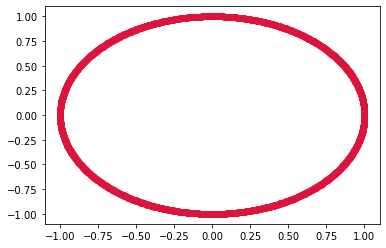

In [69]:
def circle_points(r, n):
    t = np.linspace(0, 2 * np.pi, n, endpoint=False)
    x = r * np.sin(t)
    y = r * np.cos(t)
    z = np.concatenate((np.linspace(0, 5, n // 2, endpoint=False), np.linspace(5, 0, n // 2, endpoint=False)))
    return x,y,z

n = 1000
circle = circle_points(1, n) # 10 points on a circle
colors = np.linspace(0, 1, n)

fig, ax = plt.subplots()
ax.scatter(circle[0], circle[1], color='crimson')
plt.show()

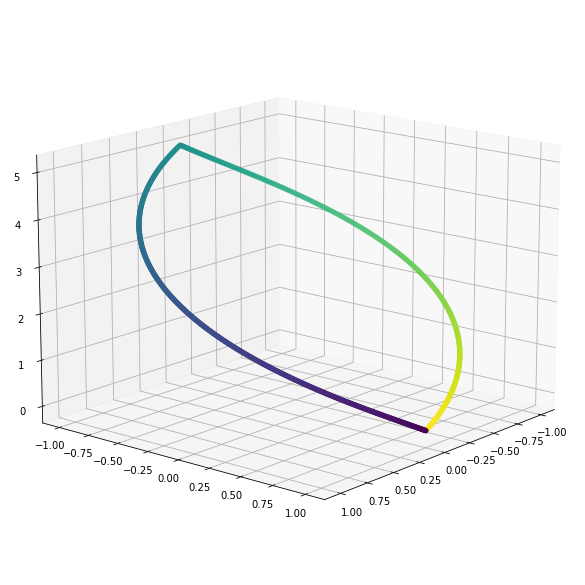

In [70]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)


ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = circle[0], ys = circle[1], zs = circle[2], c = colors)
ax.view_init(15, 40)

In [86]:
class MLP(nn.Module):
    def __init__(self, input_size = 3, output_size = 3, hidden_size = 64, num_layers = 4, useBatchNorm = False, activation = nn.ReLU(inplace = True)):
        super().__init__()
        self.activation = activation
        
        layers = [nn.Linear(input_size, hidden_size)]
        
        for i in range(num_layers - 2):
            if useBatchNorm: layers.append(nn.BatchNorm1d(encoder_hidden))
            layers.append(self.activation)
            layers.append(nn.Linear(hidden_size, hidden_size))
        
        if useBatchNorm: layers.append(nn.BatchNorm1d(encoder_hidden))
        layers.append(self.activation)
        layers.append(nn.Linear(hidden_size, output_size))

        self.net = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)

In [88]:
inputs = torch.stack([torch.tensor(c).float() for c in circle], axis = 1)
print(inputs.shape)

torch.Size([1000, 3])


In [123]:
def run_model(inputs, useBatchNorm = False, activation = nn.ReLU(inplace = True)):
    model = MLP()
    outputs = model(inputs)
    return outputs.detach().numpy()

Text(0.5, 0.87, 'Effect of applying 4 distinct randomly initialized Sigmoid MLP networks with batch norm to a simple 1D manifold')

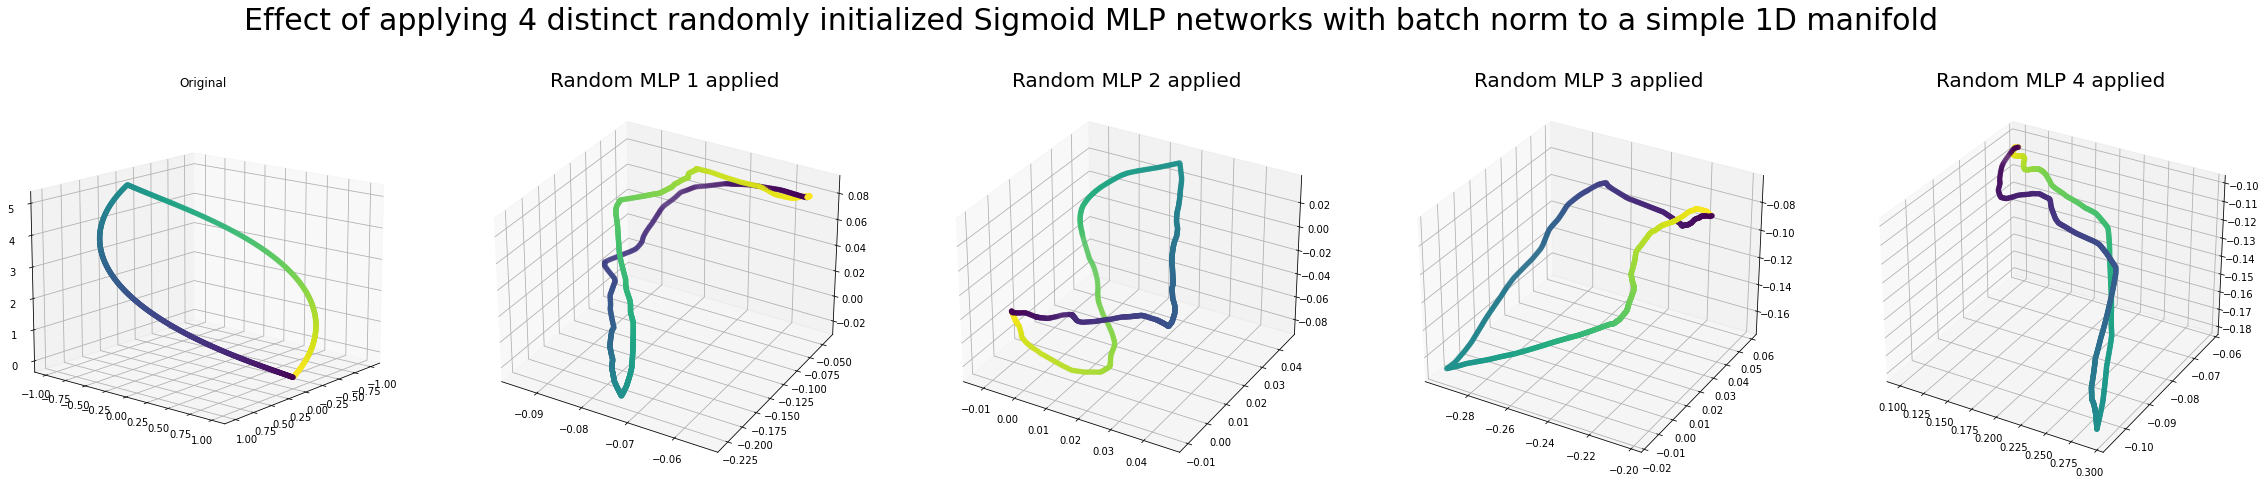

In [145]:
fig = plt.figure()
fig.set_size_inches(40, 10.5)



ax = fig.add_subplot(151, projection='3d')
ax.scatter(xs = circle[0], ys = circle[1], zs = circle[2], c = colors)
ax.set_title('Original')
ax.view_init(15, 40)

for i in range(2,6):
    ax = fig.add_subplot(150 + i, projection='3d')
#     plot_outputs = run_model(inputs, useBatchNorm=False) # ReLU
#     plot_outputs = run_model(inputs, useBatchNorm=False, activation = nn.Sigmoid())
#     plot_outputs = run_model(inputs, useBatchNorm=True)
    plot_outputs = run_model(inputs, useBatchNorm=True, activation = nn.Sigmoid())
    
    ax.scatter(xs = plot_outputs[:,0], ys = plot_outputs[:,1], zs = plot_outputs[:,2], c = colors)
    ax.set_title(f'Random MLP {i-1} applied', fontsize = 20)

fig.suptitle('Effect of applying 4 distinct randomly initialized Sigmoid MLP networks with batch norm to a simple 1D manifold', fontsize=30, y = 0.87)
    
# fig.savefig('random_MLP_transform.png', dpi=100, bbox_inches='tight')